In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2022-11-09 20:49:23.776152: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 5s 13ms/step - loss: 0.6922 - accuracy: 0.5436 - val_loss: 0.6911 - val_accuracy: 0.5764
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6887 - accuracy: 0.6173 - val_loss: 0.6863 - val_accuracy: 0.6370
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6792 - accuracy: 0.6554 - val_loss: 0.6703 - val_accuracy: 0.6564
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6294 - accuracy: 0.6820 - val_loss: 0.5884 - val_accuracy: 0.7346
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5681 - accuracy: 0.7469 - val_loss: 0.5565 - val_accuracy: 0.7504
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5402 - accuracy: 0.7589 - val_loss: 0.5306 - val_accuracy: 0.7650
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5171 - accuracy: 0.7705 - val_loss: 0.5129 - val_accuracy: 0.7722
Epoc

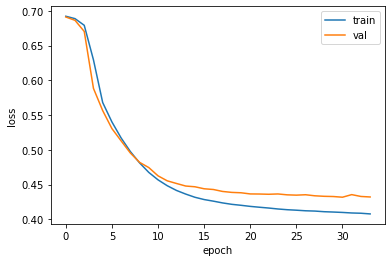

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 5s 13ms/step - loss: 0.6922 - accuracy: 0.5343 - val_loss: 0.6915 - val_accuracy: 0.5610
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6895 - accuracy: 0.5861 - val_loss: 0.6874 - val_accuracy: 0.5998
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6770 - accuracy: 0.6052 - val_loss: 0.6578 - val_accuracy: 0.6302
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6297 - accuracy: 0.6984 - val_loss: 0.6141 - val_accuracy: 0.7182
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6028 - accuracy: 0.7244 - val_loss: 0.5926 - val_accuracy: 0.7316
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5821 - accuracy: 0.7373 - val_loss: 0.5731 - val_accuracy: 0.7462
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5651 - accuracy: 0.7515 - val_loss: 0.5591 - val_accuracy:

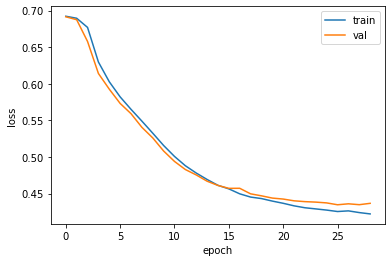

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 26ms/step - loss: 0.6928 - accuracy: 0.5231 - val_loss: 0.6923 - val_accuracy: 0.5828
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6908 - accuracy: 0.5942 - val_loss: 0.6884 - val_accuracy: 0.6412
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6797 - accuracy: 0.6343 - val_loss: 0.6641 - val_accuracy: 0.6350
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6196 - accuracy: 0.6824 - val_loss: 0.5842 - val_accuracy: 0.7138
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5613 - accuracy: 0.7307 - val_loss: 0.5386 - val_accuracy: 0.7406
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5272 - accuracy: 0.7508 - val_loss: 0.5126 - val_accuracy: 0.7524
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5066 - accuracy: 0.7618 - val_loss: 0.4938 - val_accuracy

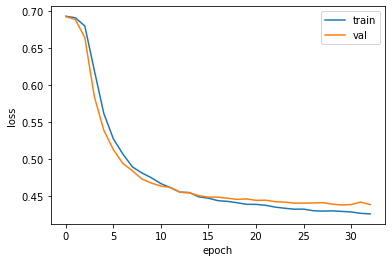

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 15ms/step - loss: 0.6916 - accuracy: 0.5349 - val_loss: 0.6905 - val_accuracy: 0.5536
Epoch 2/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6892 - accuracy: 0.5661 - val_loss: 0.6879 - val_accuracy: 0.5798
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6854 - accuracy: 0.5853 - val_loss: 0.6838 - val_accuracy: 0.5906
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6796 - accuracy: 0.6033 - val_loss: 0.6770 - val_accuracy: 0.6032
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6706 - accuracy: 0.6188 - val_loss: 0.6671 - val_accuracy: 0.6176
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6567 - accuracy: 0.6383 - val_loss: 0.6512 - val_accuracy: 0.6334
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6351 - accuracy: 0.6599 - val_loss: 0.6256 - val_accuracy:

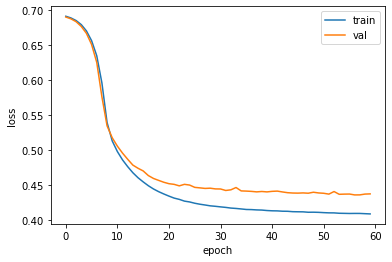

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()

In [19]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 3s 4ms/step - loss: 0.4316 - accuracy: 0.7978


[0.4315899610519409, 0.7978000044822693]